In [1]:
import tensorflow as tf 
import gensim
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pandas as pd
import re
import nltk
nltk.download('punkt')
from tensorflow.keras.preprocessing.text import text_to_word_sequence


[nltk_data] Downloading package punkt to /home/dilab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
spam = pd.read_csv('./spam.csv')
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# 중복데이터 존재(기존데이터 5573개, nuique 5169개)
spam.v2.nunique()

#중복데이터 제거 
spam.drop_duplicates(subset=['v2'], inplace=True)

#index 초기화 
spam = spam.reset_index()

spam

,index,v1,v2
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5164,5567,spam,This is the 2nd time we have tried 2 contact u...
5165,5568,ham,Will Ì_ b going to esplanade fr home?
5166,5569,ham,"Pity, * was in mood for that. So...any other s..."
5167,5570,ham,The guy did some bitching but I acted like i'd...


### 전처리

In [4]:
def lower(sen):
    text = re.sub('[^a-zA-Z]', ' ', sen).lower()
    return text

In [5]:
spam.v2=spam.v2.apply(lower)
spam

,index,v1,v2
0,0,ham,go until jurong point crazy available only ...
1,1,ham,ok lar joking wif u oni
2,2,spam,free entry in a wkly comp to win fa cup fina...
3,3,ham,u dun say so early hor u c already then say
4,4,ham,nah i don t think he goes to usf he lives aro...
...,...,...,...
5164,5567,spam,this is the nd time we have tried contact u...
5165,5568,ham,will b going to esplanade fr home
5166,5569,ham,pity was in mood for that so any other s...
5167,5570,ham,the guy did some bitching but i acted like i d...


### Tokenizer

In [6]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [7]:
# word_tokenize
w_t = spam.copy()
w_t.v2 = w_t.v2.apply(word_tokenize)

In [8]:
# WordPunctTokenizer
w_p = spam.copy()
w_p.v2 = w_p.v2.apply(WordPunctTokenizer().tokenize)
w_p

,index,v1,v2
0,0,ham,"[go, until, jurong, point, crazy, available, o..."
1,1,ham,"[ok, lar, joking, wif, u, oni]"
2,2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...,...
5164,5567,spam,"[this, is, the, nd, time, we, have, tried, con..."
5165,5568,ham,"[will, b, going, to, esplanade, fr, home]"
5166,5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5167,5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [9]:
# TreebankWordTokenizer
tree_bank = spam.copy()
tree_bank.v2 = tree_bank.v2.apply(TreebankWordTokenizer().tokenize)
tree_bank

,index,v1,v2
0,0,ham,"[go, until, jurong, point, crazy, available, o..."
1,1,ham,"[ok, lar, joking, wif, u, oni]"
2,2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...,...
5164,5567,spam,"[this, is, the, nd, time, we, have, tried, con..."
5165,5568,ham,"[will, b, going, to, esplanade, fr, home]"
5166,5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5167,5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [10]:
t_t = spam.copy()
t_t.v2 = t_t.v2.apply(text_to_word_sequence)
t_t

,index,v1,v2
0,0,ham,"[go, until, jurong, point, crazy, available, o..."
1,1,ham,"[ok, lar, joking, wif, u, oni]"
2,2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
...,...,...,...
5164,5567,spam,"[this, is, the, nd, time, we, have, tried, con..."
5165,5568,ham,"[will, b, going, to, esplanade, fr, home]"
5166,5569,ham,"[pity, was, in, mood, for, that, so, any, othe..."
5167,5570,ham,"[the, guy, did, some, bitching, but, i, acted,..."


In [11]:
pd.set_option('display.max_colwidth', -1) # 전체 출력

result_tokenizing = pd.DataFrame([['word_tokenize', w_t.iloc[5]['v2']],
                      ['WordPunctTokenizer', w_p.iloc[5]['v2']],
                      ['TreebankWordTokenizer', tree_bank.iloc[5]['v2']],
                      ['text_to_word_sequence', t_t.iloc[5]['v2']]], columns = ['Tokenizer', 'Result'])
result_tokenizing

/tmp/ipykernel_1132002/208024689.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # 전체 출력


,Tokenizer,Result
0,word_tokenize,"[freemsg, hey, there, darling, it, s, been, week, s, now, and, no, word, back, i, d, like, some, fun, you, up, for, it, still, tb, ok, xxx, std, chgs, to, send, to, rcv]"
1,WordPunctTokenizer,"[freemsg, hey, there, darling, it, s, been, week, s, now, and, no, word, back, i, d, like, some, fun, you, up, for, it, still, tb, ok, xxx, std, chgs, to, send, to, rcv]"
2,TreebankWordTokenizer,"[freemsg, hey, there, darling, it, s, been, week, s, now, and, no, word, back, i, d, like, some, fun, you, up, for, it, still, tb, ok, xxx, std, chgs, to, send, to, rcv]"
3,text_to_word_sequence,"[freemsg, hey, there, darling, it, s, been, week, s, now, and, no, word, back, i, d, like, some, fun, you, up, for, it, still, tb, ok, xxx, std, chgs, to, send, to, rcv]"


### text_to_word_sequence + stopwords

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords 

def stop_word(data):
    stop_words = set(stopwords.words('english')) 
    words = [word for word in data if word not in stop_words]
    return words


t_t.v2 = t_t.v2.apply(stop_word)

[nltk_data] Downloading package stopwords to /home/dilab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### embedding

In [53]:
#skip-gram
#not spam word2vec 
model_ham_sg = Word2Vec(t_t[t_t.v1 == 'ham']['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=1) # skip-gram
print(model_ham_sg)
model_ham_sg.save('w2v_model_ham_sg')
w2v_model_ham_sg = Word2Vec.load('w2v_model_ham_sg')


#spam word2vec
model_spam_sg = Word2Vec(t_t[t_t.v1 == 'spam']['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=1) # skip-gram
print(model_spam_sg)
model_spam_sg.save('w2v_model_spam_sg')
w2v_model_spam_sg = Word2Vec.load('w2v_model_spam_sg')

#spam & ham 
model_ham_spam_sg = Word2Vec(t_t['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=1) # skip-gram
print(model_ham_spam_sg)
model_ham_spam_sg.save('w2v_model_ham_spam_sg')
w2v_model_ham_spam_sg = Word2Vec.load('w2v_model_ham_spam_sg')

Word2Vec<vocab=1204, vector_size=100, alpha=0.025>
Word2Vec<vocab=433, vector_size=100, alpha=0.025>
Word2Vec<vocab=1531, vector_size=100, alpha=0.025>


In [54]:
#cbow 
#not spam word2vec 
model_ham_cbow = Word2Vec(t_t[t_t.v1 == 'ham']['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=0) # skip-gram
print(model_ham_cbow)
model_ham_cbow.save('w2v_model_ham_cbow')
w2v_model_ham_cbow = Word2Vec.load('w2v_model_ham_cbow')

#spam word2vec
model_spam_cbow = Word2Vec(t_t[t_t.v1 == 'spam']['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=0) # skip-gram
print(model_spam_cbow)
model_spam_cbow.save('w2v_model_spam_cbow')
w2v_model_spam_cbow = Word2Vec.load('w2v_model_spam_cbow')

#spam & ham 
model_ham_spam_cbow = Word2Vec(t_t['v2'], min_count=5, vector_size=100, window=2, epochs=200, sg=0) # skip-gram
print(model_ham_spam_cbow)
model_ham_spam_cbow.save('w2v_model_ham_spam_cbow')
w2v_model_ham_spam_cbow = Word2Vec.load('w2v_model_ham_spam_cbow')

Word2Vec<vocab=1204, vector_size=100, alpha=0.025>
Word2Vec<vocab=433, vector_size=100, alpha=0.025>
Word2Vec<vocab=1531, vector_size=100, alpha=0.025>


In [55]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

#not spam 
ct_vector1 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_ham = sum(t_t[t_t.v1 == 'ham']['v2'], []) 
ct_ham = ct_vector1.fit_transform(corpus_ham)

count_ham = pd.DataFrame( {'word' : ct_vector1.get_feature_names(),
                           'count' : ct_ham.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10)

/home/dilab/anaconda3/envs/djlee_env1/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
160,gt,288
245,lt,287
298,ok,255
155,got,227
212,know,225
229,like,222
153,good,215
67,come,212
450,ur,198
426,time,192


In [66]:
#spam
vector2 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam = sum(t_t[t_t.v1 == 'spam']['v2'], []) 
spam = vector2.fit_transform(corpus_spam)

count_ham = pd.DataFrame( {'word' : vector2.get_feature_names(),
                           'count' : spam.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10)

/home/dilab/anaconda3/envs/djlee_env1/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
144,free,197
437,txt,141
446,ur,119
396,stop,114
251,mobile,111
415,text,109
61,claim,96
345,reply,96
486,www,83
322,prize,82


In [68]:
#spam & ham 
vector3 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False)
corpus_spam_ham = sum(t_t['v2'], []) 
spam = vector3.fit_transform(corpus_spam_ham)

count_ham = pd.DataFrame( {'word' : vector3.get_feature_names(),
                           'count' : spam.sum(axis = 0).flat})
count_ham.sort_values('count', ascending = False).head(10)

/home/dilab/anaconda3/envs/djlee_env1/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
446,ur,317
163,gt,288
238,lt,287
294,ok,260
139,free,253
208,know,243
225,like,234
160,got,233
159,good,227
78,come,214


In [59]:
#ham skip-gram
w2v_model_ham_sg.wv.most_similar('gt')


[('lt', 0.7630465626716614),
 ('decimal', 0.5992558002471924),
 ('dollars', 0.543987512588501),
 ('feb', 0.41307172179222107),
 ('mins', 0.41011086106300354),
 ('yrs', 0.4053132236003876),
 ('rs', 0.4023570120334625),
 ('scream', 0.3847850561141968),
 ('bucks', 0.3746246099472046),
 ('salary', 0.3737648129463196)]

In [60]:
#ham cbow
w2v_model_ham_cbow.wv.most_similar('gt')

[('lt', 0.7630465626716614),
 ('decimal', 0.5992558002471924),
 ('dollars', 0.543987512588501),
 ('feb', 0.41307172179222107),
 ('mins', 0.41011086106300354),
 ('yrs', 0.4053132236003876),
 ('rs', 0.4023570120334625),
 ('scream', 0.3847850561141968),
 ('bucks', 0.3746246099472046),
 ('salary', 0.3737648129463196)]

In [63]:
#spam skip-gram
w2v_model_spam_sg.wv.most_similar('free')

[('minutes', 0.44125786423683167),
 ('tomorrow', 0.40315988659858704),
 ('half', 0.39010122418403625),
 ('comp', 0.3644012212753296),
 ('phones', 0.3615228235721588),
 ('crazy', 0.35059022903442383),
 ('true', 0.35037678480148315),
 ('rental', 0.34821686148643494),
 ('plus', 0.34536412358283997),
 ('digital', 0.3384089171886444)]

In [64]:
#spam cbow
w2v_model_spam_cbow.wv.most_similar('free')

[('minutes', 0.4038458466529846),
 ('latest', 0.38505229353904724),
 ('phones', 0.38247308135032654),
 ('colour', 0.3761167526245117),
 ('get', 0.37550920248031616),
 ('mths', 0.3560161590576172),
 ('plus', 0.35412076115608215),
 ('tomorrow', 0.3480639159679413),
 ('st', 0.3303874433040619),
 ('extra', 0.32648536562919617)]

In [70]:
w2v_model_ham_spam_sg.wv.most_similar('ok')

[('uni', 0.4602634906768799),
 ('problem', 0.4049754738807678),
 ('dinner', 0.402574360370636),
 ('pub', 0.3823489248752594),
 ('worry', 0.36011990904808044),
 ('cuz', 0.35908442735671997),
 ('five', 0.3518129587173462),
 ('home', 0.3517214357852936),
 ('mm', 0.3468843996524811),
 ('fix', 0.346502423286438)]

In [71]:
#ham & spam cbow
w2v_model_ham_spam_cbow.wv.most_similar('ok')

[('home', 0.4122908413410187),
 ('anything', 0.35479381680488586),
 ('day', 0.34348684549331665),
 ('nothing', 0.3334616422653198),
 ('back', 0.3026300370693207),
 ('u', 0.29982447624206543),
 ('pub', 0.29300162196159363),
 ('morning', 0.2911602556705475),
 ('okay', 0.2900930345058441),
 ('din', 0.27674320340156555)]

### visualization

In [72]:
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib as mpl
from gensim.models import Word2Vec, FastText

In [73]:
# 시각화에서 한글이 깨지기 때문에 따로 폰트를 올려주어야합니다. 
path_nanum = "./NanumBarunpenB.otf"
prop = fm.FontProperties(fname=path_nanum)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False 

In [74]:
words = []

for list in t_t.v2: 
    for word in list:
        words.append(word)

In [75]:
#word2vec에 대한 시각화를 진행할 것으므로, model에 원하는 word2vec 모델을 올려줍니다. 
model = Word2Vec.load('w2v_model_ham_spam_sg')

# 가장 빈도수가 높은 800개의 단어를 추출합니다. 
freq_list = Counter(words).most_common(100)
vocab = [i[0] for i in freq_list if len(i[0])>1]

# 해당 단어들에 해당하는 임베딩 벡터
X = model.wv[vocab]

# 2차원으로 축소합니다. 
tsne = TSNE(perplexity=30,n_components=2, init='pca', n_iter=3500, random_state=12)

In [76]:
tsne

TSNE(init='pca', n_iter=3500, perplexity=30, random_state=12)

In [77]:
def tsne_2d(title, tsne):
    # 100 => 2차원
    X_tsne = tsne.fit_transform(X[:300,:])
    df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])
    %matplotlib inline
    fig = plt.figure()
    fig.set_size_inches(20, 10)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df["x"], df["y"])
    for word, pos in df.iterrows():
        ax.annotate(word, pos, fontsize=15, fontproperties=prop)
    plt.title(title)
    plt.show()

/home/dilab/anaconda3/envs/djlee_env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/dilab/anaconda3/envs/djlee_env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


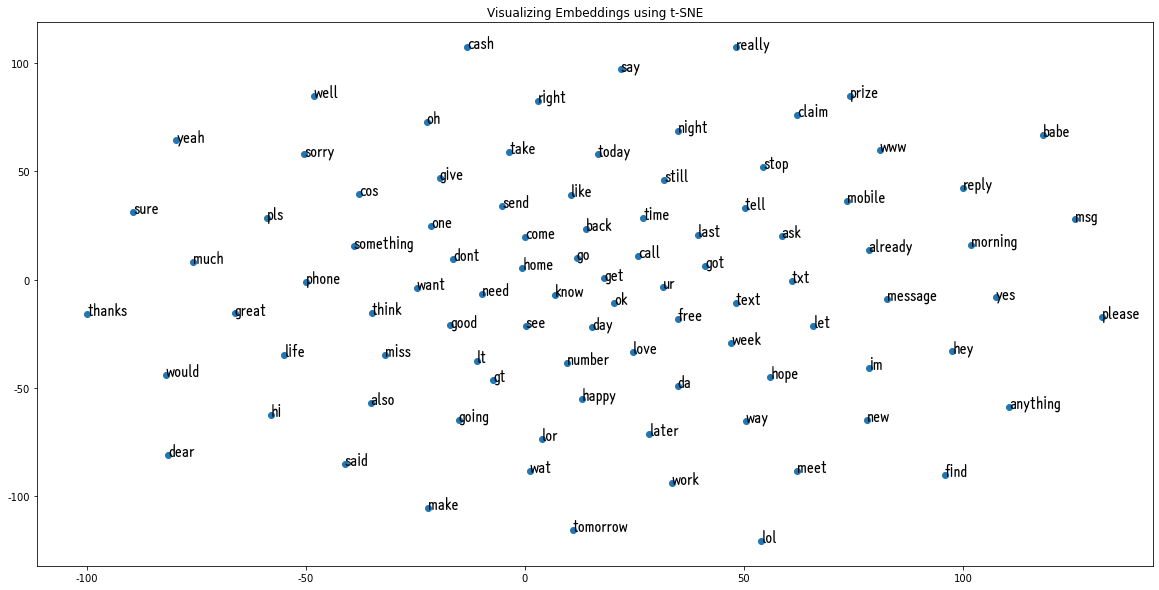

In [78]:
tsne_2d('Visualizing Embeddings using t-SNE', tsne)